In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
final_dataset = pd.read_csv('car_clean_data.csv')

In [3]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,4.50,8.76,145500,0,6,1,0,1,1
1,3.70,7.20,120000,1,6,1,0,1,1
2,1.58,10.25,140000,2,14,0,1,1,1
3,2.25,8.55,127000,0,10,1,0,1,1
4,1.30,7.38,120000,0,13,0,1,1,1


In [4]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.629940,-0.224890,-0.246556,-0.415361,0.207136,-0.207136,-0.383053,-0.587266
Present_Price,0.629940,1.000000,-0.053215,-0.093860,-0.114267,0.206729,-0.206729,-0.156444,-0.374342
Kms_Driven,-0.224890,-0.053215,1.000000,0.297417,0.417761,0.270750,-0.270750,0.204142,0.200960
Owner,-0.246556,-0.093860,0.297417,1.000000,0.517561,0.018606,-0.018606,0.231147,0.154422
no_year,-0.415361,-0.114267,0.417761,0.517561,1.000000,-0.049176,0.049176,0.246700,0.244663
Fuel_Type_Diesel,0.207136,0.206729,0.270750,0.018606,-0.049176,1.000000,-1.000000,0.003889,0.029313
Fuel_Type_Petrol,-0.207136,-0.206729,-0.270750,-0.018606,0.049176,-1.000000,1.000000,-0.003889,-0.029313
Seller_Type_Individual,-0.383053,-0.156444,0.204142,0.231147,0.246700,0.003889,-0.003889,1.000000,0.372892
Transmission_Manual,-0.587266,-0.374342,0.200960,0.154422,0.244663,0.029313,-0.029313,0.372892,1.000000


In [5]:
import seaborn as sns

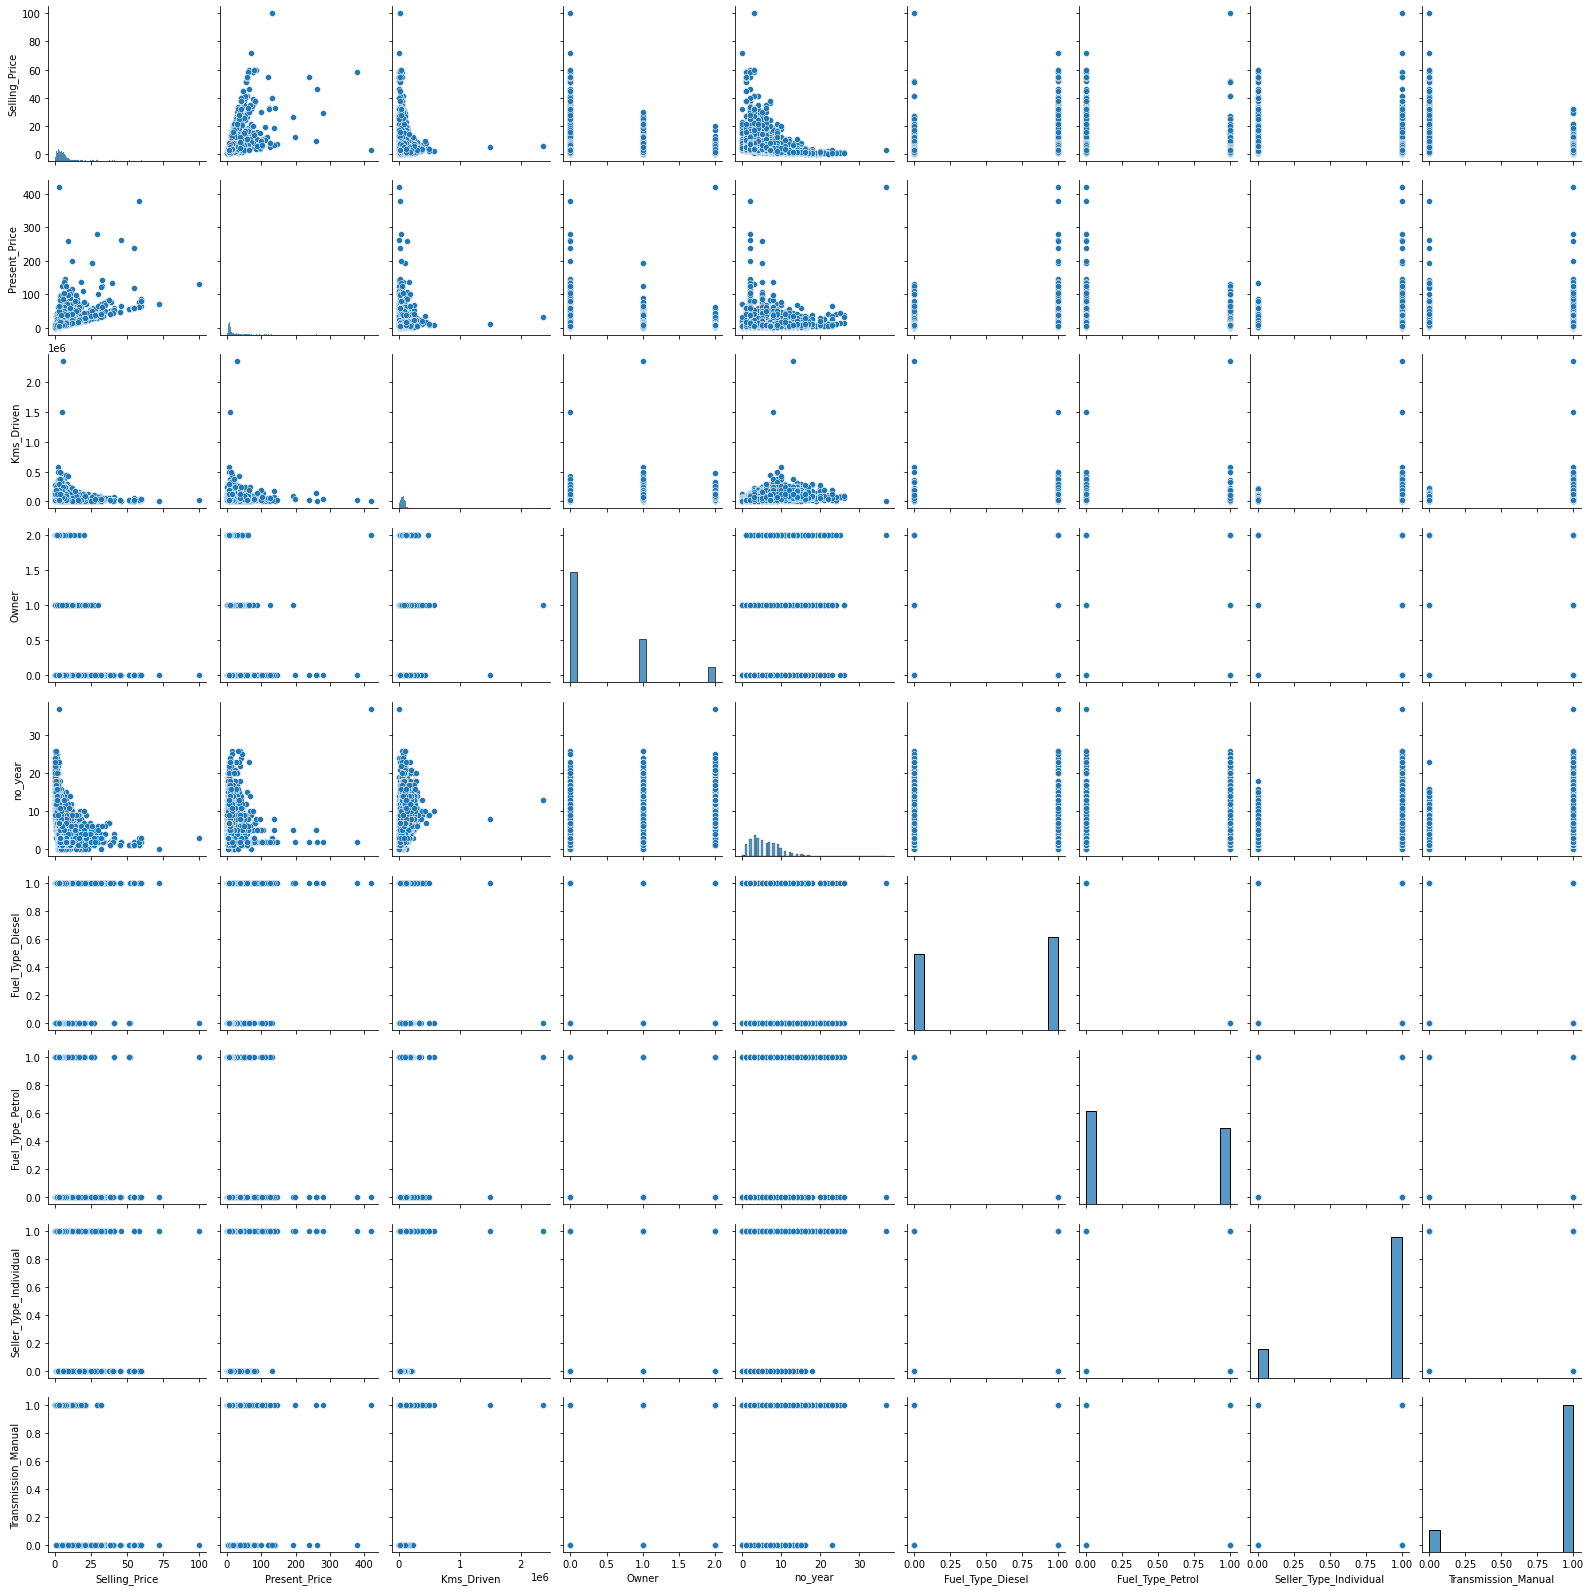

In [6]:
sns.pairplot(final_dataset)

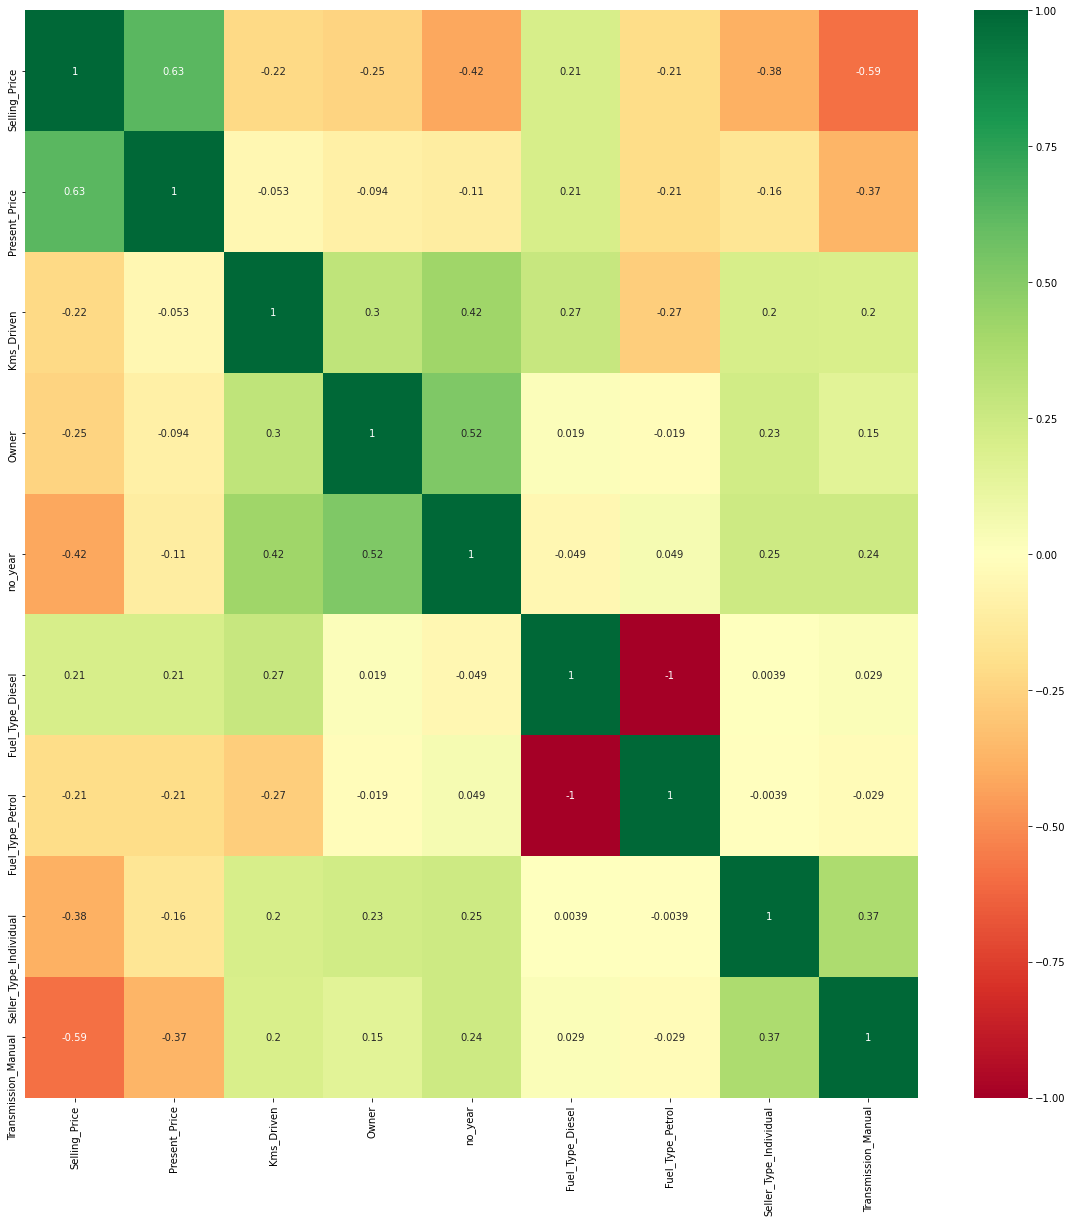

In [7]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [9]:
X['Owner'].unique()

array([0, 1, 2], dtype=int64)

In [10]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,8.76,145500,0,6,1,0,1,1
1,7.20,120000,1,6,1,0,1,1
2,10.25,140000,2,14,0,1,1,1
3,8.55,127000,0,10,1,0,1,1
4,7.38,120000,0,13,0,1,1,1


In [11]:
y.head()

0    4.50
1    3.70
2    1.58
3    2.25
4    1.30
Name: Selling_Price, dtype: float64

In [12]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [13]:
print(model.feature_importances_)

[0.33201306 0.05367759 0.01338807 0.12461209 0.09163663 0.00269048
 0.04968807 0.33229402]


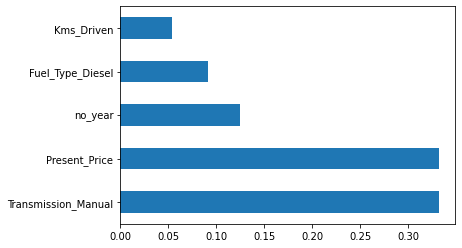

In [14]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
regressor=RandomForestRegressor()

In [18]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [21]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [22]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [23]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [24]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [25]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [26]:
rf_random.best_score_

-2.7141499723677547

In [27]:
predictions=rf_random.predict(X_test)

C:\Users\hrgha\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

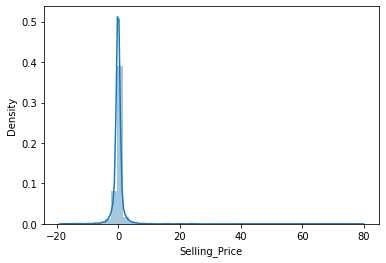

In [28]:
sns.distplot(y_test-predictions)

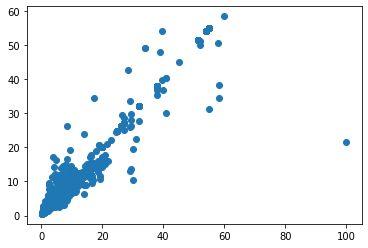

In [29]:
plt.scatter(y_test,predictions)

In [30]:
# single prediction

rf_random.predict([[10,10000,0,2,0,1,1,1]])

array([4.81267767])

In [31]:
from sklearn import metrics

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.738623496896855
MSE: 6.039221338915715
RMSE: 2.4574827240319954


In [33]:
import bz2
import pickle
import _pickle as cPickle

In [34]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model_final.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [35]:
# Saves the "data" with the "title" and adds the .pickle
def full_pickle(title, data):
 pikd = open(title + '.pickle', 'wb')
 pickle.dump(data, pikd)
 pikd.close()

full_pickle('model_pickle', rf_random) 
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [36]:
def loosen(file):
 pikd = open(file, 'rb')
 data = pickle.load(pikd)
 pikd.close()
 return data

data = loosen('model_pickle.pickle')

data

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [37]:
# Pickle a file and then compress it into a file with extension 
def compressed_pickle(title, data):
 with bz2.BZ2File(title + '.pbz2', 'w') as f: 
     cPickle.dump(data, f)

compressed_pickle('model_pickle_com', data) 

In [40]:
def compressed_pickle(title, data):
 with bz2.BZ2File(title + '.pbz2', 'w') as f: 
     cPickle.dump(data, f)

data = "model_pickle_com.pbz2"
compressed_pickle('model_pickle_com_com', data) 

In [38]:
# Load any compressed pickle file
def decompress_pickle(file):
 data = bz2.BZ2File(file, 'rb')
 data = cPickle.load(data)
 return data

data = decompress_pickle('     cPickle.dump(data, f)
.pbz2') 
data

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [39]:
def compressed_pickle(title, data):
 with bz2.BZ2File(title + ‘.pbz2’, ‘w’) as f: 
 cPickle.dump(data, f)

SyntaxError: invalid character in identifier (<ipython-input-39-3b56858a64ac>, line 2)